https://www.kaggle.com/datasets/leonardopena/top-spotify-songs-from-20102019-by-year

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
import time
import itertools
from scipy.special import binom

In [2]:
spotify = pd.read_csv('top10s.csv', encoding_errors='replace')
spotify.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [3]:
print(spotify.shape)
spotify.shape

(603, 15)


(603, 15)

In [4]:
test = spotify.sample(frac=0.2, axis=0)
train = spotify.drop(index=test.index)

In [48]:
Xtrain = train[['year','bpm', 'nrgy','dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']]
Xtrain = (Xtrain-Xtrain.mean())/Xtrain.std()
#Xtrain = pd.get_dummies(data=Xtrain, drop_first=True)
ytrain = train[['pop']]
ytrain = (ytrain-ytrain.mean())/ytrain.std()

In [49]:
Xtrain.shape

(482, 10)

In [8]:
ytrain

,pop
0,1.108680
1,1.040204
2,0.903253
4,0.766302
6,0.697826
...,...
597,0.629351
598,0.560875
599,0.560875
600,0.218497


## Best Subset Selection

In [9]:
def processSubset(X, y, predictor_variables, response_variable):
    # Fit model on feature_set and calculate RSS
    
    model = sm.OLS(y,X[list(predictor_variables)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(predictor_variables)]) - y[response_variable]) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [10]:
k=2
for combo in itertools.combinations(Xtrain.columns, k):
    print(combo)

('year', 'bpm')
('year', 'nrgy')
('year', 'dnce')
('year', 'dB')
('year', 'live')
('year', 'val')
('year', 'dur')
('year', 'acous')
('year', 'spch')
('bpm', 'nrgy')
('bpm', 'dnce')
('bpm', 'dB')
('bpm', 'live')
('bpm', 'val')
('bpm', 'dur')
('bpm', 'acous')
('bpm', 'spch')
('nrgy', 'dnce')
('nrgy', 'dB')
('nrgy', 'live')
('nrgy', 'val')
('nrgy', 'dur')
('nrgy', 'acous')
('nrgy', 'spch')
('dnce', 'dB')
('dnce', 'live')
('dnce', 'val')
('dnce', 'dur')
('dnce', 'acous')
('dnce', 'spch')
('dB', 'live')
('dB', 'val')
('dB', 'dur')
('dB', 'acous')
('dB', 'spch')
('live', 'val')
('live', 'dur')
('live', 'acous')
('live', 'spch')
('val', 'dur')
('val', 'acous')
('val', 'spch')
('dur', 'acous')
('dur', 'spch')
('acous', 'spch')


In [41]:
total_to_fit = 0
p = 54
for k in range(1,55):
    total_to_fit += binom(p,k)

In [47]:
(total_to_fit*0.009334310850439882)/60/60/24/365

5332064.798046859

In [25]:
t0 = time.time()
k=2
results = []

for combo in itertools.combinations(Xtrain.columns, k):
    results.append(processSubset(Xtrain, ytrain, combo, 'pop'))

models = pd.DataFrame(results)

best_model = models.loc[models['RSS'].argmin()]

t1 = time.time()
print("Processed", models.shape[0], "models on", k, "predictors in", (t1-t0), "seconds.")

Processed 45 models on 2 predictors in 0.2575829029083252 seconds.


In [32]:
def getBest(X, y, k, response_variable):
    
    t0 = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(X, y, combo, response_variable))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    t1 = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (t1-t0), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [33]:
models_best = pd.DataFrame(columns=["RSS", "model"])

t2 = time.time()
for i in range(1,11):
    models_best.loc[i] = getBest(Xtrain, ytrain, i, 'pop')

t3 = time.time()
print("Total elapsed time:", (t3-t2), "seconds.")

Processed 10 models on 1 predictors in 0.05345797538757324 seconds.
Processed 45 models on 2 predictors in 0.2743411064147949 seconds.
Processed 120 models on 3 predictors in 0.8571920394897461 seconds.
Processed 210 models on 4 predictors in 1.992931842803955 seconds.
Processed 252 models on 5 predictors in 2.6660938262939453 seconds.
Processed 210 models on 6 predictors in 2.474297046661377 seconds.
Processed 120 models on 7 predictors in 1.0413150787353516 seconds.
Processed 45 models on 8 predictors in 0.13720178604125977 seconds.
Processed 10 models on 9 predictors in 0.03389692306518555 seconds.
Processed 1 models on 10 predictors in 0.002584218978881836 seconds.
Total elapsed time: 9.549077987670898 seconds.


In [36]:
(0.009334310850439882*1048575.0)/60

163.12874999999997

**Check the time when we include top genre**

## Forward Stepwise Selection

In [50]:
def forward(X, y, predictors, response_variable):
    
    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    t0 = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(X, y, predictors + [p], response_variable))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    t1 = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (t1-t0), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [51]:
models_fwd = pd.DataFrame(columns=["RSS", "model", "AIC", "BIC", "AdjR2"])

t0 = time.time()
predictors = []

for i in range(1,len(Xtrain.columns)+1):    
    models_fwd.loc[i] = forward(Xtrain, ytrain, predictors, 'pop')
    predictors = models_fwd.loc[i]["model"].model.exog_names
    models_fwd.loc[i, 'AIC'] = models_fwd.loc[i, 'model'].aic
    models_fwd.loc[i, 'BIC'] = models_fwd.loc[i, 'model'].bic
    models_fwd.loc[i, 'AdjR2'] = models_fwd.loc[i, 'model'].rsquared_adj
    

t1 = time.time()
print("Total elapsed time:", (t1-t0), "seconds.")

Processed  10 models on 1 predictors in 0.05638313293457031 seconds.
Processed  9 models on 2 predictors in 0.03910398483276367 seconds.
Processed  8 models on 3 predictors in 0.042833805084228516 seconds.
Processed  7 models on 4 predictors in 0.04838895797729492 seconds.
Processed  6 models on 5 predictors in 0.08018302917480469 seconds.
Processed  5 models on 6 predictors in 0.07096219062805176 seconds.
Processed  4 models on 7 predictors in 0.039263010025024414 seconds.
Processed  3 models on 8 predictors in 0.010027170181274414 seconds.
Processed  2 models on 9 predictors in 0.005873918533325195 seconds.
Processed  1 models on 10 predictors in 0.003397226333618164 seconds.
Total elapsed time: 0.4163329601287842 seconds.


In [52]:
models_fwd 

,RSS,model,AIC,BIC,AdjR2
1,443.326424,<statsmodels.regression.linear_model.Regressio...,1329.543342,1333.721286,0.076407
2,420.294118,<statsmodels.regression.linear_model.Regressio...,1305.827871,1314.183759,0.122567
3,411.325443,<statsmodels.regression.linear_model.Regressio...,1297.431125,1309.964957,0.139498
4,404.149663,<statsmodels.regression.linear_model.Regressio...,1290.94818,1307.659956,0.152741
5,402.648774,<statsmodels.regression.linear_model.Regressio...,1291.154847,1312.044567,0.154118
6,401.747219,<statsmodels.regression.linear_model.Regressio...,1292.074409,1317.142074,0.154239
7,401.37812,<statsmodels.regression.linear_model.Regressio...,1293.631375,1322.876984,0.153237
8,401.139042,<statsmodels.regression.linear_model.Regressio...,1295.344189,1328.767742,0.151956
9,400.951616,<statsmodels.regression.linear_model.Regressio...,1297.11893,1334.720427,0.15056
10,400.827605,<statsmodels.regression.linear_model.Regressio...,1298.969828,1340.74927,0.149023


4


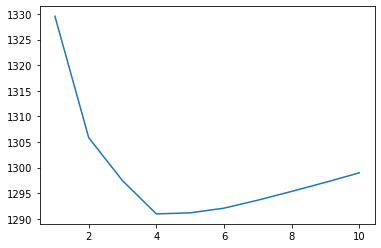

In [60]:
print(np.argmin(models_fwd['AIC']) + 1)
plt.plot(np.arange(len(models_fwd)) + 1,models_fwd['AIC'])

4


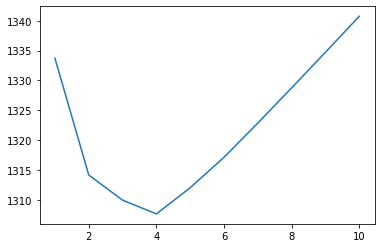

In [61]:
print(np.argmin(models_fwd['BIC']) + 1)
plt.plot(np.arange(len(models_fwd)) + 1,models_fwd['BIC'])

6


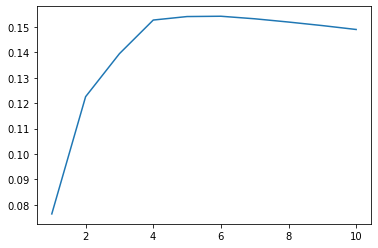

In [62]:
print(np.argmax(models_fwd['AdjR2'])+ 1)
plt.plot(np.arange(len(models_fwd)) + 1,models_fwd['AdjR2'])

In [63]:
models_fwd.loc[np.argmin(models_fwd['AIC']) + 1,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    pop   R-squared (uncentered):                   0.160
Model:                            OLS   Adj. R-squared (uncentered):              0.153
Method:                 Least Squares   F-statistic:                              22.72
Date:                Mon, 30 May 2022   Prob (F-statistic):                    3.34e-17
Time:                        12:02:58   Log-Likelihood:                         -641.47
No. Observations:                 482   AIC:                                      1291.
Df Residuals:                     478   BIC:                                      1308.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.2813      0.043      6.564      0.000       0.197       0.366
dB             0.2884      0.049      5.859      0.000       0.192       0.385
nrgy          -0.2100      0.052     -4.004      0.000      -0.313      -0.107
val            0.1345      0.046      2.913      0.004       0.044       0.225
==============================================================================
Omnibus:                      136.325   Durbin-Watson:                   0.532
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              355.892
Skew:                          -1.393   Prob(JB):                     5.24e-78
Kurtosis:                       6.155   Cond. No.                         2.05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Backward Stepwise Selection

In [64]:
def backward(X, y, predictors, response_variable):
    
    t0 = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(X, y, combo, response_variable))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    t1 = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (t1-t0), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [65]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(Xtrain.columns)))

t2 = time.time()
predictors = Xtrain.columns

j = 0
while(len(predictors) > 1): 
    i = len(predictors)-1
    models_bwd.loc[i] = backward(Xtrain, ytrain, predictors, 'pop')
    predictors = models_bwd.loc[i]["model"].model.exog_names
    models_bwd.loc[i, 'AIC'] = models_bwd.loc[i, 'model'].aic
    models_bwd.loc[i, 'BIC'] = models_bwd.loc[i, 'model'].bic
    models_bwd.loc[i, 'AdjR2'] = models_bwd.loc[i, 'model'].rsquared_adj
    if j == 1000000:
        break
    j+=1

t3 = time.time()
print("Total elapsed time:", (t3-t2), "seconds.")

Processed  10 models on 9 predictors in 0.036519765853881836 seconds.
Processed  9 models on 8 predictors in 0.032872915267944336 seconds.
Processed  8 models on 7 predictors in 0.05444502830505371 seconds.
Processed  7 models on 6 predictors in 0.06873512268066406 seconds.
Processed  6 models on 5 predictors in 0.06589388847351074 seconds.
Processed  5 models on 4 predictors in 0.038968801498413086 seconds.
Processed  4 models on 3 predictors in 0.024042129516601562 seconds.
Processed  3 models on 2 predictors in 0.014646768569946289 seconds.
Processed  2 models on 1 predictors in 0.008575916290283203 seconds.
Total elapsed time: 0.3565833568572998 seconds.


In [66]:
models_bwd

,RSS,model,AIC,BIC,AdjR2
1,443.326424,<statsmodels.regression.linear_model.Regressio...,1329.543342,1333.721286,0.076407
2,420.294118,<statsmodels.regression.linear_model.Regressio...,1305.827871,1314.183759,0.122567
3,411.325443,<statsmodels.regression.linear_model.Regressio...,1297.431125,1309.964957,0.139498
4,404.149663,<statsmodels.regression.linear_model.Regressio...,1290.948180,1307.659956,0.152741
5,402.648774,<statsmodels.regression.linear_model.Regressio...,1291.154847,1312.044567,0.154118
6,401.747219,<statsmodels.regression.linear_model.Regressio...,1292.074409,1317.142074,0.154239
7,401.37812,<statsmodels.regression.linear_model.Regressio...,1293.631375,1322.876984,0.153237
8,401.139042,<statsmodels.regression.linear_model.Regressio...,1295.344189,1328.767742,0.151956
9,400.951616,<statsmodels.regression.linear_model.Regressio...,1297.118930,1334.720427,0.150560


4


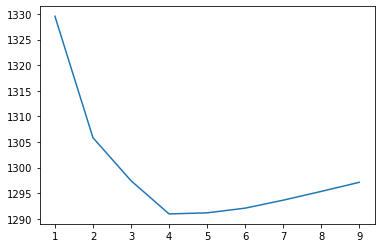

In [74]:
print(np.argmin(models_bwd['AIC']) + 1)
plt.plot(np.arange(len(models_bwd)) + 1,models_bwd['AIC'])

4


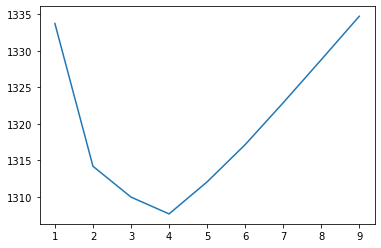

In [75]:
print(np.argmin(models_bwd['BIC']) + 1)
plt.plot(np.arange(len(models_bwd)) + 1,models_bwd['BIC'])

6


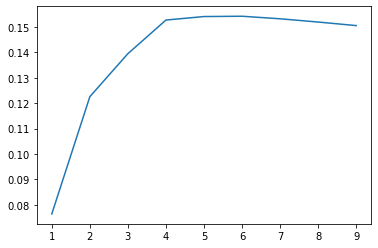

In [73]:
print(np.argmax(models_bwd['AdjR2']) + 1)
plt.plot(np.arange(len(models_bwd)) + 1,models_bwd['AdjR2'])

In [77]:
models_bwd.loc[np.argmin(models_bwd['AIC']) + 1,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    pop   R-squared (uncentered):                   0.160
Model:                            OLS   Adj. R-squared (uncentered):              0.153
Method:                 Least Squares   F-statistic:                              22.72
Date:                Mon, 30 May 2022   Prob (F-statistic):                    3.34e-17
Time:                        12:11:48   Log-Likelihood:                         -641.47
No. Observations:                 482   AIC:                                      1291.
Df Residuals:                     478   BIC:                                      1308.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.2813      0.043      6.564      0.000       0.197       0.366
nrgy          -0.2100      0.052     -4.004      0.000      -0.313      -0.107
dB             0.2884      0.049      5.859      0.000       0.192       0.385
val            0.1345      0.046      2.913      0.004       0.044       0.225
==============================================================================
Omnibus:                      136.325   Durbin-Watson:                   0.532
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              355.892
Skew:                          -1.393   Prob(JB):                     5.24e-78
Kurtosis:                       6.155   Cond. No.                         2.05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
Xtest = test[['year', 'nrgy', 'dB', 'val']]
Xtest = (Xtest-Xtest.mean())/Xtest.std()
#Xtest = pd.get_dummies(data=Xtest, drop_first=True)
ytest = test[['pop']]
ytest = (ytest-ytest.mean())/ytest.std()
test_preds = models_bwd.loc[np.argmin(models_bwd['AIC']) + 1,'model'].predict(Xtest)

In [80]:
ytrain['pop']

0      1.108680
1      1.040204
2      0.903253
4      0.766302
6      0.697826
         ...   
597    0.629351
598    0.560875
599    0.560875
600    0.218497
601    0.150021
Name: pop, Length: 482, dtype: float64

In [81]:
test_preds

329   -0.153717
471   -0.235724
10    -0.557424
58    -0.322078
425    0.003600
         ...   
497    0.496410
295    0.199066
427    0.427857
479    0.277893
5     -0.652615
Length: 121, dtype: float64

In [84]:
np.sqrt(((test_preds - ytest['pop'])**2).mean())

1.06484275066003

### HW: Implement Hybrid Stepwise Selection
### HW: Select single best model using CV prediction error